# Kaggle Entry - Titanic

Yes this is the one everyone does. I'm not looking for anything ground breaking here just to play and practice the submit. 


In [4]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random
import pandas
%matplotlib inline

In [16]:
train_file = Path('./data/titanic/train.csv')
sampling_file = Path('./data/titanic/test.csv')
example_submission = Path('./data/titanic/gender_submission.csv')

train_data = pandas.read_csv(train_file)
sampling_data = pandas.read_csv(sampling_file)
example_data = pandas.read_csv(example_submission)

In [17]:
example_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [18]:
# pclass: A proxy for socio-economic status (SES)
#     1st = Upper
#     2nd = Middle
#     3rd = Lower
# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
# sibsp: The dataset defines family relations in this way...
#     Sibling = brother, sister, stepbrother, stepsister
#     Spouse = husband, wife (mistresses and fiancés were ignored)
# parch: The dataset defines family relations in this way...
#     Parent = mother, father
#     Child = daughter, son, stepdaughter, stepson
#     Some children travelled only with a nanny, therefore parch=0 for them.
# Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
train_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [26]:
lower_class = train_data.loc[train_data.Pclass == 3]["Survived"]
lower_class = sum(lower_class)/len(lower_class)

print("% of lower class who survived:", lower_class)

% of lower class who survived: 0.24236252545824846


(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

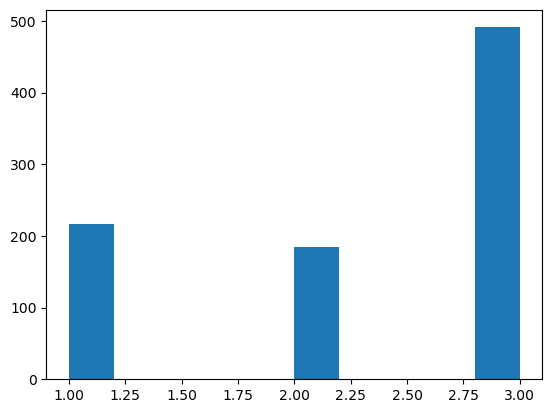

In [27]:
plt.hist(train_data.Pclass)

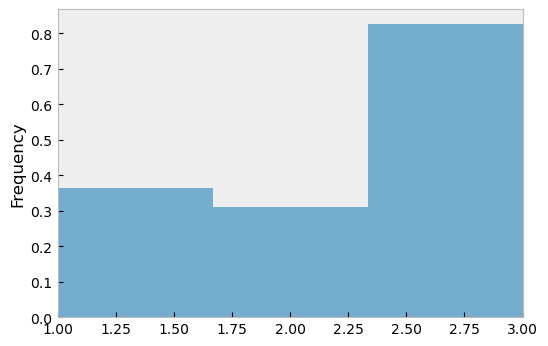

In [45]:
fig, ax = plt.subplots(figsize = (6,4))
train_data.Pclass.plot(kind = "hist", alpha=0.65, density = True, bins = 3)
plt.style.use("bmh")
ax.set_xlim(1, 3)
# Later in the code
ax.grid(False)
plt.show()